In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set default style for plots
sns.set(style='whitegrid')


In [2]:
# Load the dataset
hyundai = pd.read_csv(r"/content/005380.KS_weekly.csv")
hyundai


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,149000.0,149000.0,137500.0,137500.0,104316.375000,2331421
1,2016-01-07,134500.0,143500.0,133500.0,141000.0,106971.695312,2821121
2,2016-01-14,141000.0,142000.0,135500.0,137000.0,103937.031250,2302378
3,2016-01-21,138000.0,140500.0,134500.0,135000.0,102419.710938,2843030
4,2016-01-28,135000.0,136000.0,126500.0,132500.0,100523.039062,3524339
...,...,...,...,...,...,...,...
473,2025-01-23,208000.0,208500.0,203000.0,205000.0,205000.000000,1077548
474,2025-01-30,204500.0,208500.0,200000.0,203500.0,203500.000000,4055426
475,2025-02-06,203500.0,210000.0,197700.0,208500.0,208500.000000,4730124
476,2025-02-13,208000.0,210000.0,199500.0,199800.0,199800.000000,1718164


In [3]:
hyundai1 = hyundai.drop(['Date','Adj Close'], axis = 1)

In [4]:
hyundai1

,Open,High,Low,Close,Volume
0,149000.0,149000.0,137500.0,137500.0,2331421
1,134500.0,143500.0,133500.0,141000.0,2821121
2,141000.0,142000.0,135500.0,137000.0,2302378
3,138000.0,140500.0,134500.0,135000.0,2843030
4,135000.0,136000.0,126500.0,132500.0,3524339
...,...,...,...,...,...
473,208000.0,208500.0,203000.0,205000.0,1077548
474,204500.0,208500.0,200000.0,203500.0,4055426
475,203500.0,210000.0,197700.0,208500.0,4730124
476,208000.0,210000.0,199500.0,199800.0,1718164


In [5]:
hyundai1.isnull().sum()


,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [6]:
hyundai1.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


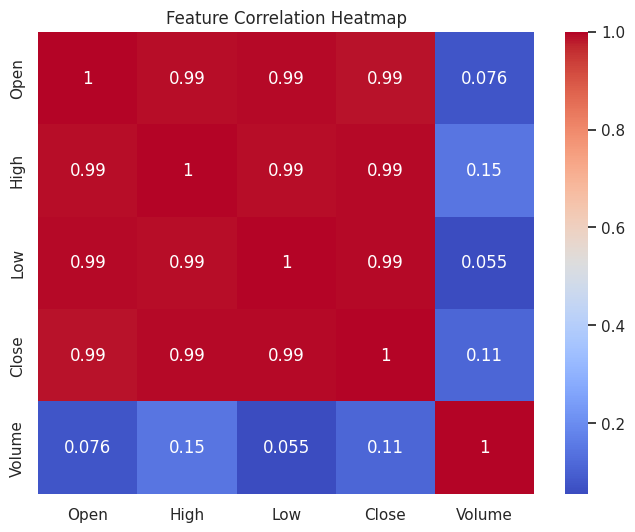

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(hyundai1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


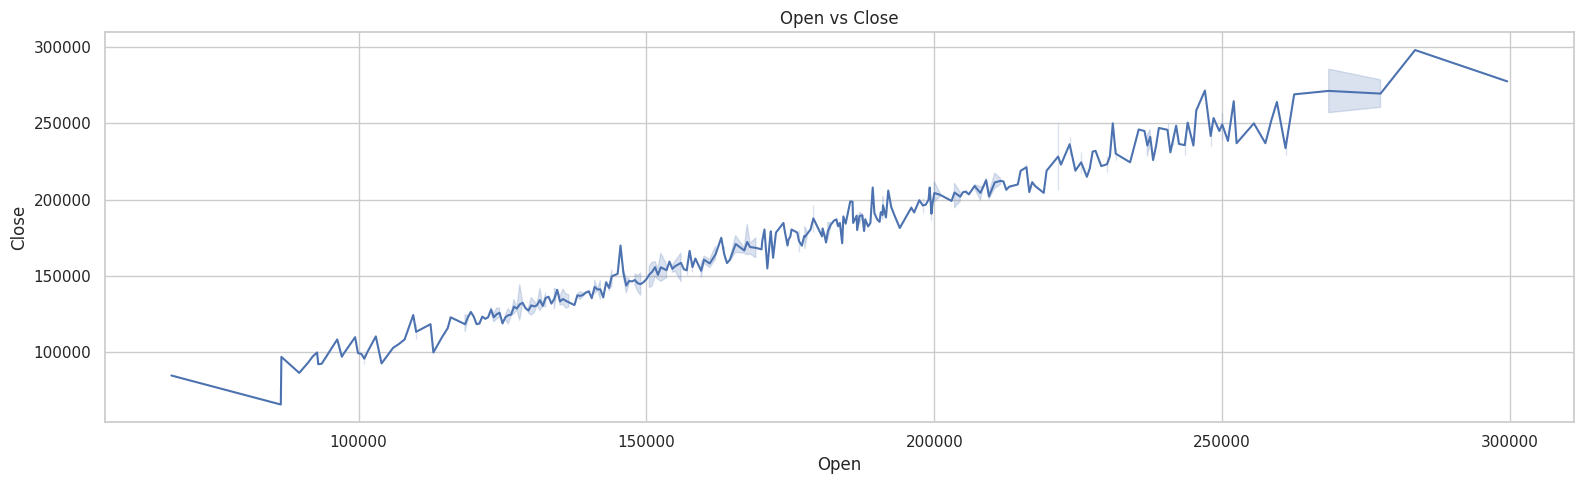

In [33]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=hyundai1, x='Open', y='Close')
plt.title("Open vs Close")
plt.tight_layout()
plt.show()


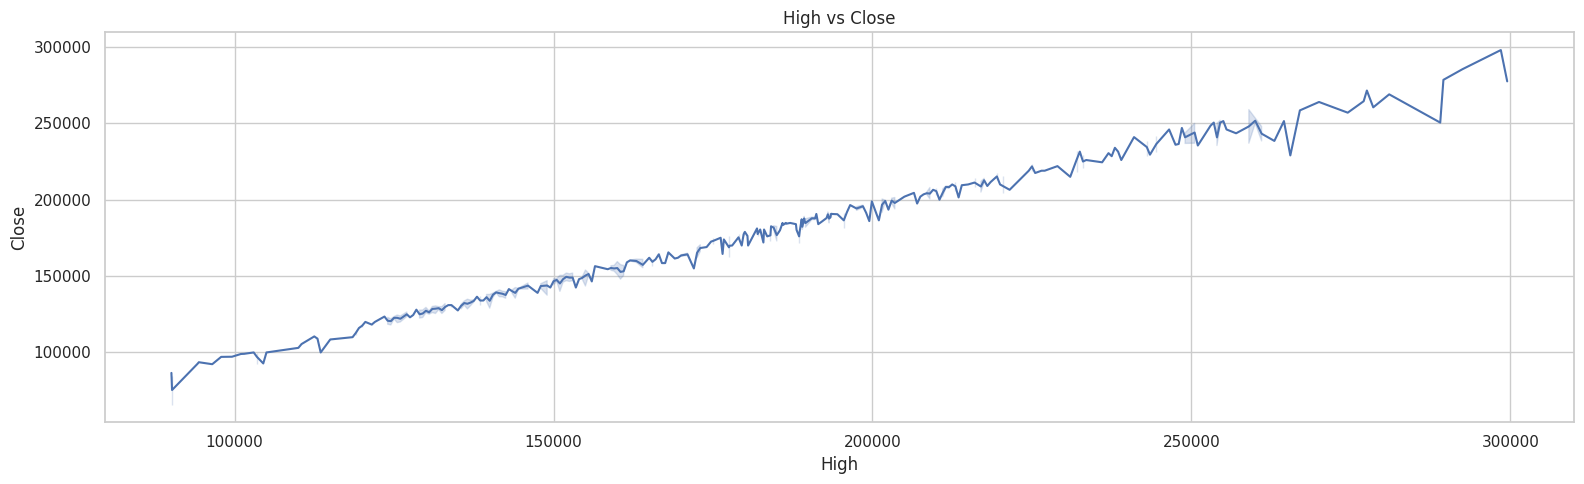

In [36]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=hyundai1, x='High', y='Close')
plt.title("High vs Close")
plt.tight_layout()
plt.show()

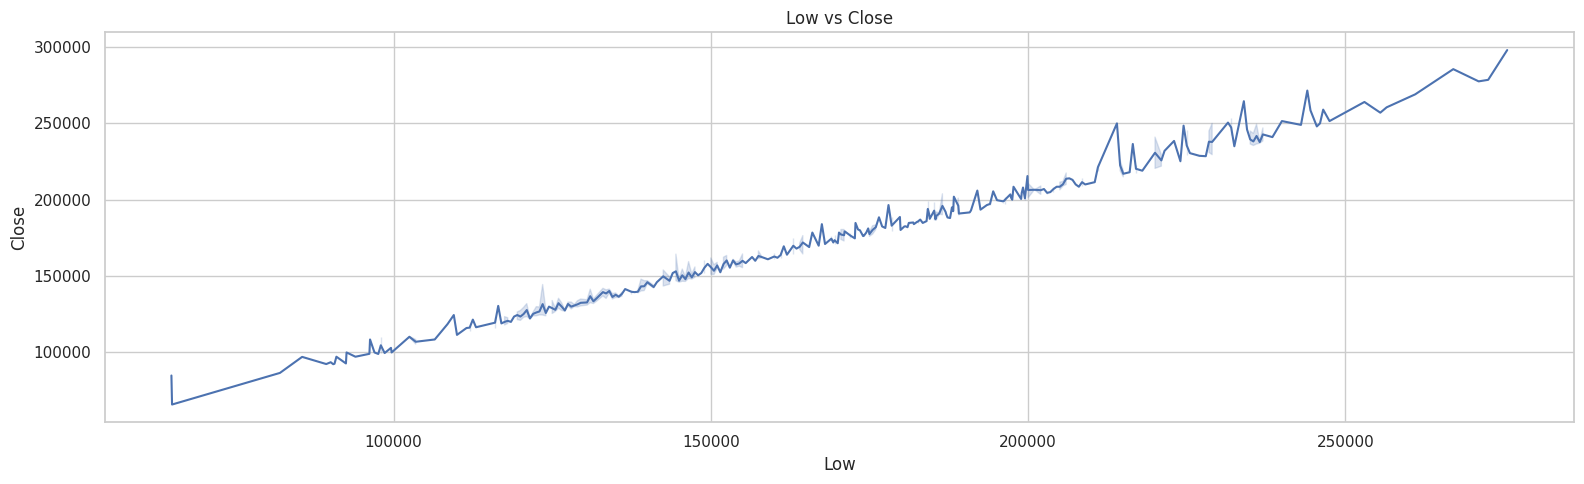

In [38]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=hyundai1, x='Low', y='Close')
plt.title("Low vs Close")
plt.tight_layout()
plt.show()

In [9]:
# Define input and output
features = ['Open', 'High', 'Low', 'Volume']
X = hyundai1[features]
y = hyundai1['Close']


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [13]:
y_pred = model.predict(X_test_scaled)

# Combine predictions and actuals into a DataFrame
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results.head()


,Actual,Predicted
0,211500.0,211385.238970
1,136500.0,135204.749053
2,123000.0,123424.997756
3,165000.0,166199.983341
4,155500.0,159286.991092


In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 11425722.61
R² Score: 0.9922


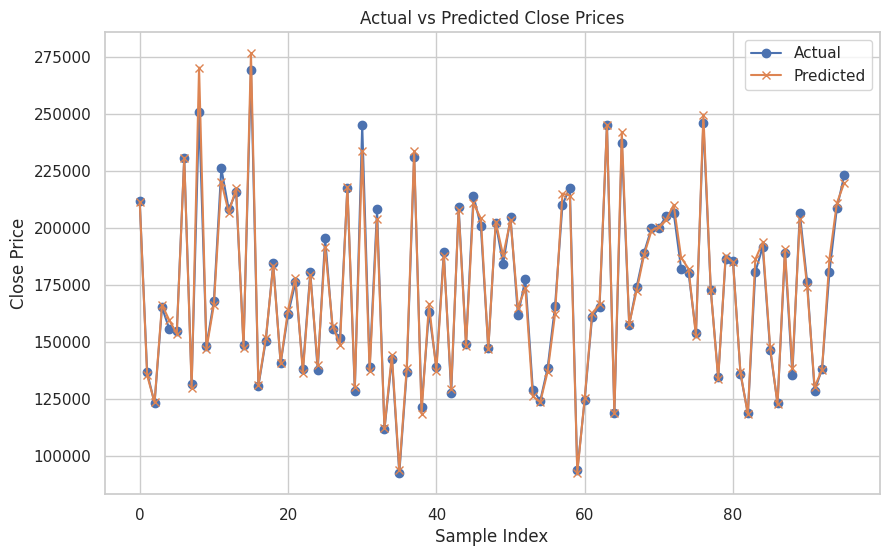

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'].values, label='Actual', marker='o')
plt.plot(results['Predicted'].values, label='Predicted', marker='x')
plt.title("Actual vs Predicted Close Prices")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.show()


In [16]:
# Example: Predict with new data [open, high, low, volume]
new_data = np.array([[135000.0,136000.0,126500.0,3524339]])
new_data_scaled = scaler.transform(new_data)
predicted_close = model.predict(new_data_scaled)
print(f"Predicted Close Price: {predicted_close[0]:.2f}")

Predicted Close Price: 128806.13


In [17]:
import pickle
with open("hyundai_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("hyundai_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)